Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [56]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [7]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [8]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [9]:
def bias(y, z):
    return (y - z)

In [10]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [80]:
# Число деревьев в ансамбле
n_trees = [3,5,7,10,15]

# для простоты примем коэффициенты равными 1
coefs = [[1] * x for x in n_trees]

# Максимальная глубина деревьев
max_depth = [3, 5, 7, 10, 15]

# Шаг
eta = 0.25

#trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [82]:
n_trees, coefs

([3, 5, 7, 10, 15],
 [[1, 1, 1],
  [1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [75]:
x

[1, 2, 3, 4]

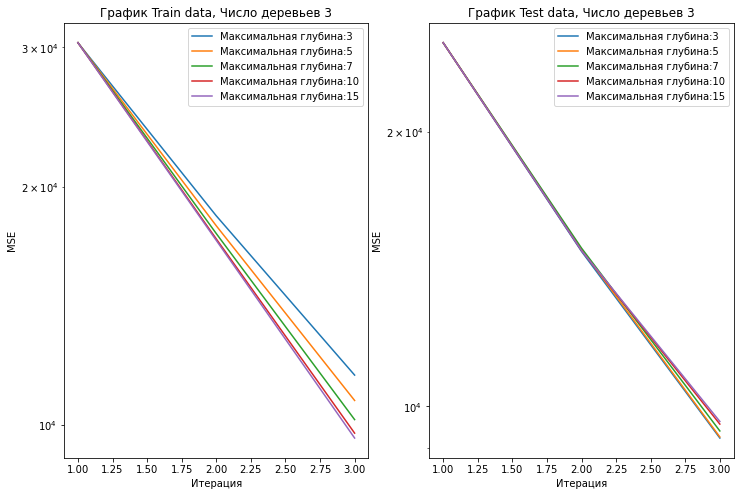

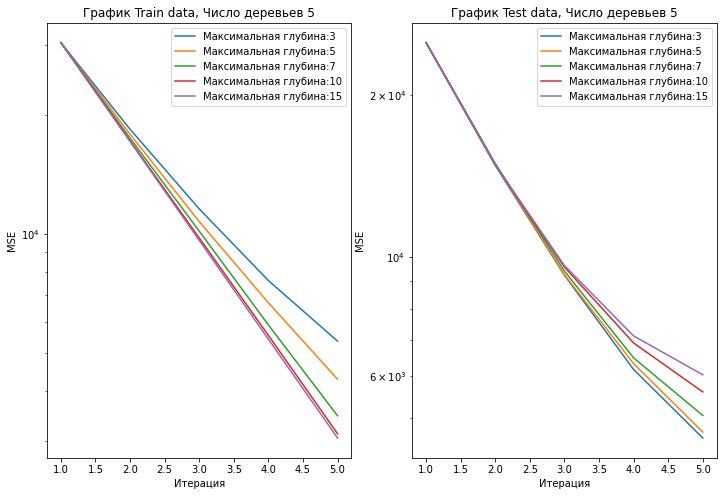

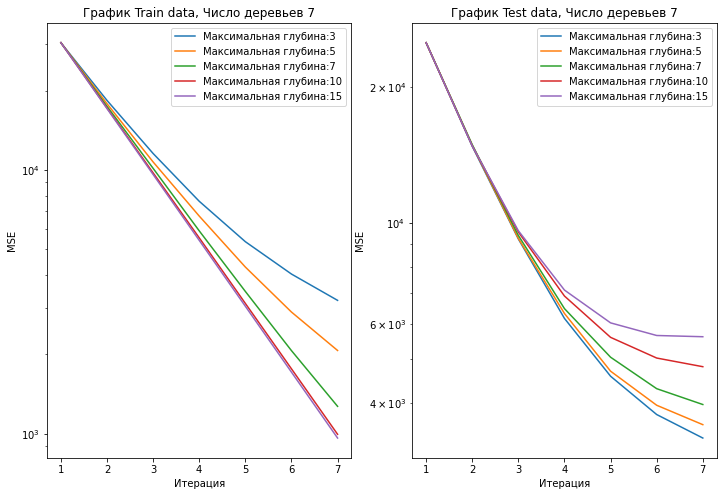

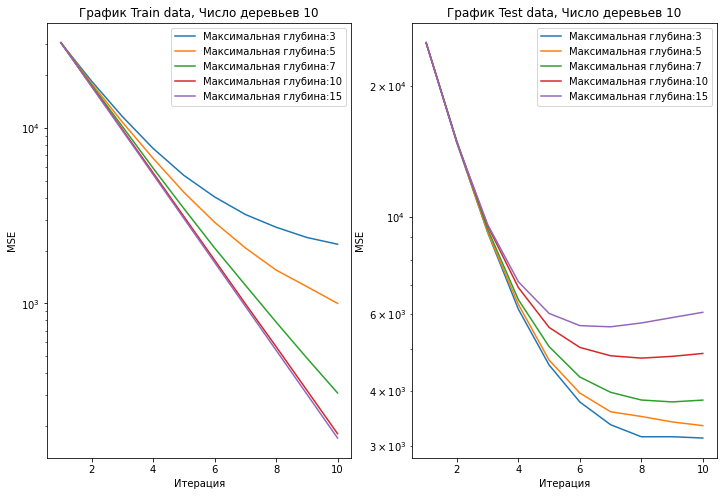

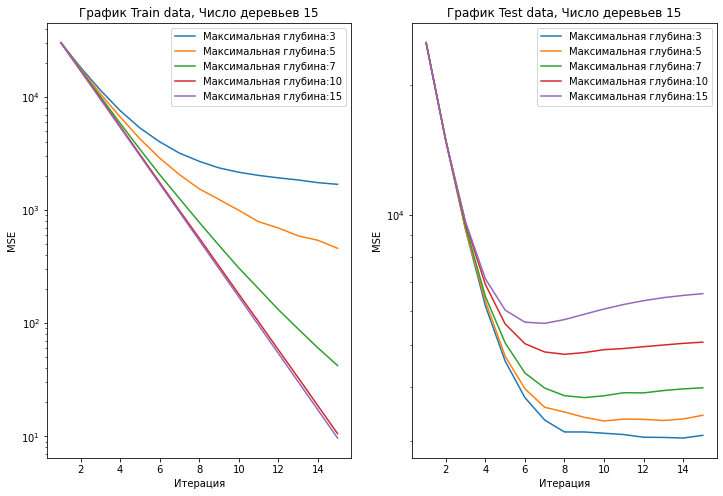

In [88]:
for n, c in zip(n_trees, coefs):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(12, 8)
    fig.subplots_adjust(hspace=0.25)
    for de in max_depth:
        trees, train_errors, test_errors = gb_fit(n, de, X_train, X_test, y_train, y_test, c, eta)
        ax[0].plot(range(1,len(trees)+1), train_errors, label=f'Максимальная глубина:{de}')
        ax[1].plot(range(1,len(trees)+1), test_errors, label=f'Максимальная глубина:{de}')
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')
    
    ax[0].set_title(f"График Train data, Число деревьев {n}")
    ax[1].set_title(f"График Test data, Число деревьев {n}")
    
    ax[0].set_xlabel("Итерация")
    ax[0].set_ylabel("MSE")
    
    ax[1].set_xlabel("Итерация")
    ax[1].set_ylabel("MSE")
    
    ax[0].legend()
    ax[1].legend()
    
    plt.show()


Как видно по графикам слишком большая глубина деревьев или слишком большое их колличество приводит к переобучению и необходимо найти оптимальное значение этих параметров. Для этих данных это ~3-5 глубина и ~6-8 деревьев